In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
from pdf2image import convert_from_path

print(tf.__version__)

2.10.0


In [2]:
#pdf to jpeg conversion:
jpgs = convert_from_path("../Handwritten_table/Soil_Analysis_Data_Table.pdf")

for page in range(len(jpgs)):
    jpgs[page].save('page' + str(page) + '.jpg', 'JPEG')
    
for page in range(len(jpgs)):
    img = cv2.imread('page' + str(page) + '.jpg')
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

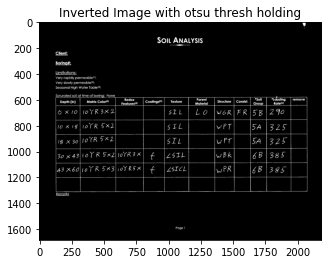

In [3]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_bin1 = 255-img_gray
thresh1,img_bin_otsu = cv2.threshold(img_bin1,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()


In [4]:
cv2.getStructuringElement(1,(10,6))

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 4))
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


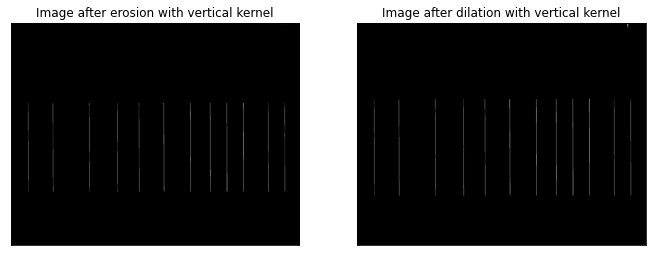

In [6]:


import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()
     


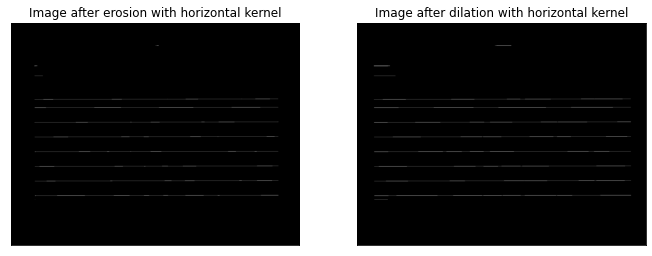

In [7]:


plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin_otsu, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()
     


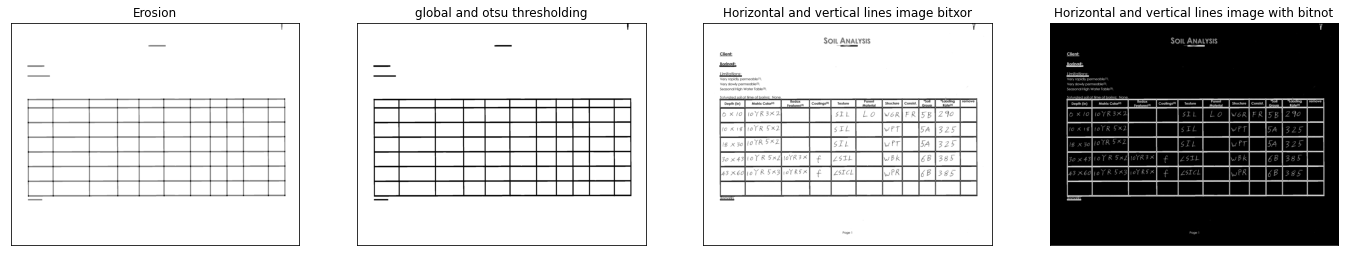

In [8]:


plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img_bin1,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()
     


In [9]:
#import pytesseract

In [10]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [11]:


boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))
     


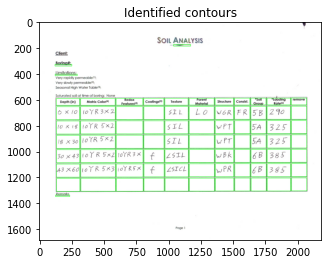

In [12]:
boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# assume that `img` and `boxes` have been defined as in your previous code snippet
for i, box in enumerate(boxes):
     # extract the coordinates of the current bounding box
     x, y, w, h = box
     #expand cell size:
     box_expand = 2
     # extract the ROI using NumPy array indexing
     roi = img[(y - box_expand):(y + h + box_expand), (x - box_expand):(x + w + box_expand)]

     # save the ROI as a JPEG image
     filename = f'../Save_Cells_Here/box_{i}.jpg'
     cv2.imwrite(filename, roi)
